<a href="https://colab.research.google.com/github/JoaoLucasAbreu/Seaborn_Graphics/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Seaborn**

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**Loading DataFrames by Seaborn GitHub Repository**

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
#Confirming this CSV file is a DataFrame
type(penguins)

pandas.core.frame.DataFrame

**Line Graphic**

In [ ]:
df_btc = pd.read_csv('https://datahub.io/cryptocurrency/bitcoin/r/bitcoin.csv')
df_btc.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [ ]:
df_btc.shape

(3605, 16)

In [ ]:
#Searching the last 20 data lines about price
df_btc['price(USD)'].tail(20)

3585    6387.24
3586    6365.47
3587    6363.62
3588    6433.38
3589    6468.50
3590    6522.27
3591    6442.60
3592    6386.13
3593    6413.63
3594    6411.76
3595    6373.19
3596    6351.24
3597    5736.15
3598    5645.32
3599    5578.58
3600    5559.74
3601    5620.78
3602    4863.93
3603    4465.54
3604    4611.57
Name: price(USD), dtype: float64

In [ ]:
#Defining the entire DataFrame, limiting to the last 20 data lines
df_btc = df_btc.tail(20)

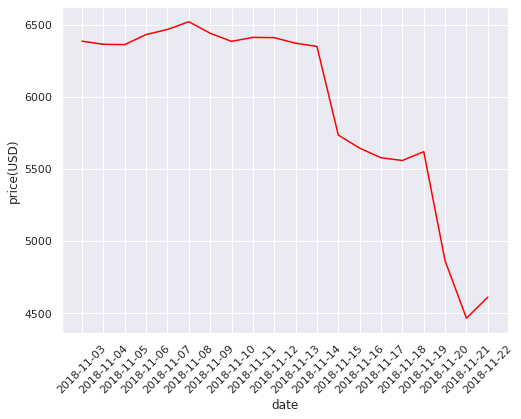

In [ ]:
plt.figure(figsize = (8,6))
plt.xticks(rotation = 45)
sns.set_theme(style = "whitegrid")
sns.lineplot(data = df_btc, x='date', y='price(USD)', color='red')


**Bar Graphic**

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_sv_sex = titanic.groupby('sex')['survived'].sum().reset_index()
df_sv_sex

,sex,survived
0,female,233
1,male,109


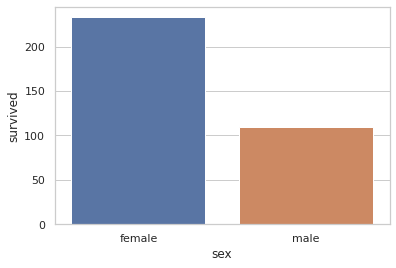

In [ ]:
sns.barplot(data = df_sv_sex, x = 'sex', y = 'survived')

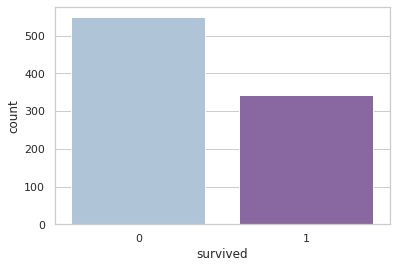

In [ ]:
sns.countplot(data = titanic, x = 'survived', palette="BuPu")

**Histogram**

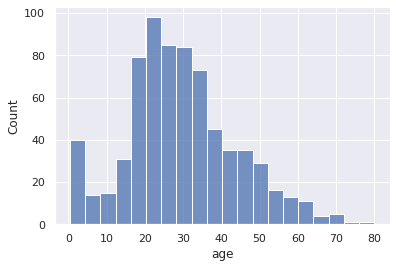

In [ ]:
sns.set_theme(style = "darkgrid")
sns.histplot(data = titanic, x = 'age')

**Boxplot**

In [ ]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df_titanic = titanic.dropna()

In [ ]:
df_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

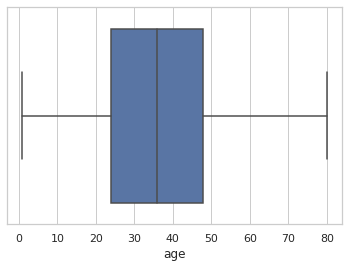

In [ ]:
sns.boxplot(data = df_titanic, x = 'age')

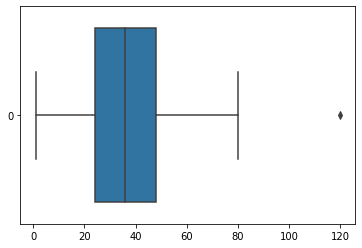

In [ ]:
age_outlier = list(df_titanic['age'])
age_outlier.append(120)

sns.boxplot(data = age_outlier, orient='h')

**Heatmap**

In [ ]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


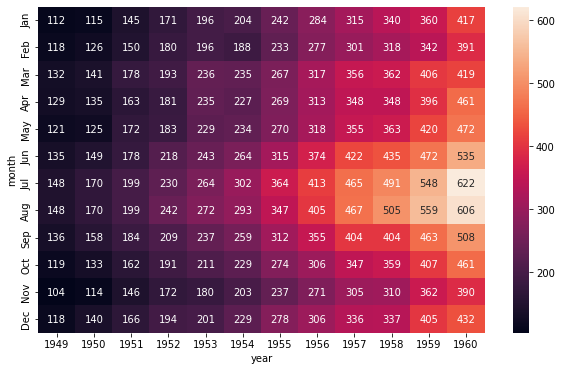

In [ ]:
plt.figure( figsize = (10, 6))
sns.heatmap(data = flights, annot = True, fmt='.0f')

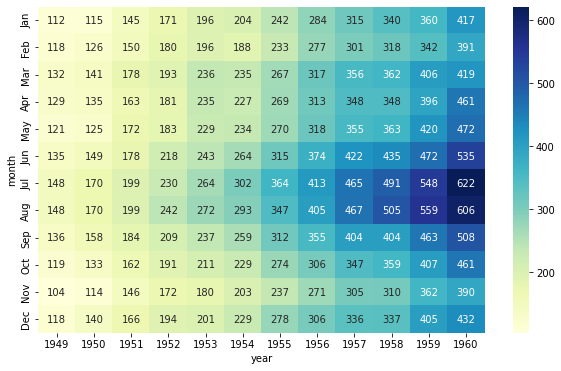

In [ ]:
plt.figure( figsize = (10, 6))
sns.heatmap(data = flights, annot = True, fmt='.0f', cmap = 'YlGnBu')

**Dispersion Graphic with Linear Regression**

In [ ]:
crashes = sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Figure size 576x432 with 0 Axes>

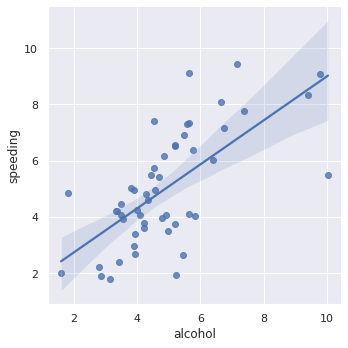

In [ ]:
plt.figure(figsize = (8, 6))
sns.set_theme(style = "darkgrid")
sns.lmplot(data = crashes, x = 'alcohol', y = "speeding")

**Jointplot**

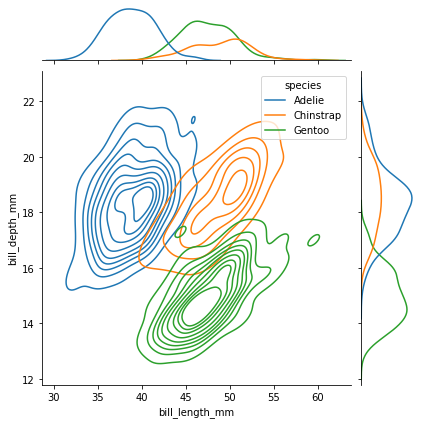

In [13]:
penguins = sns.load_dataset("penguins")
sns.jointplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, hue= 'species',kind='kde');

**Pairplot**

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


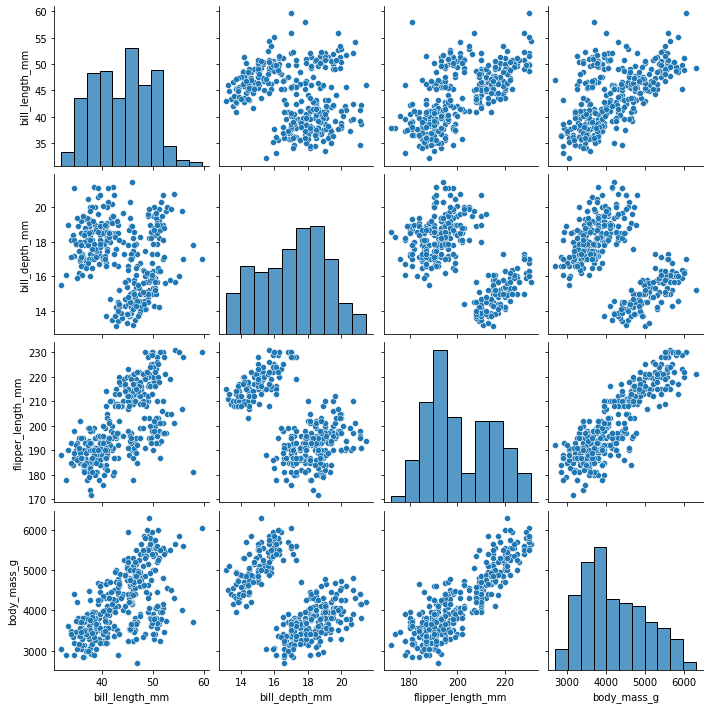

In [7]:
sns.pairplot(penguins)

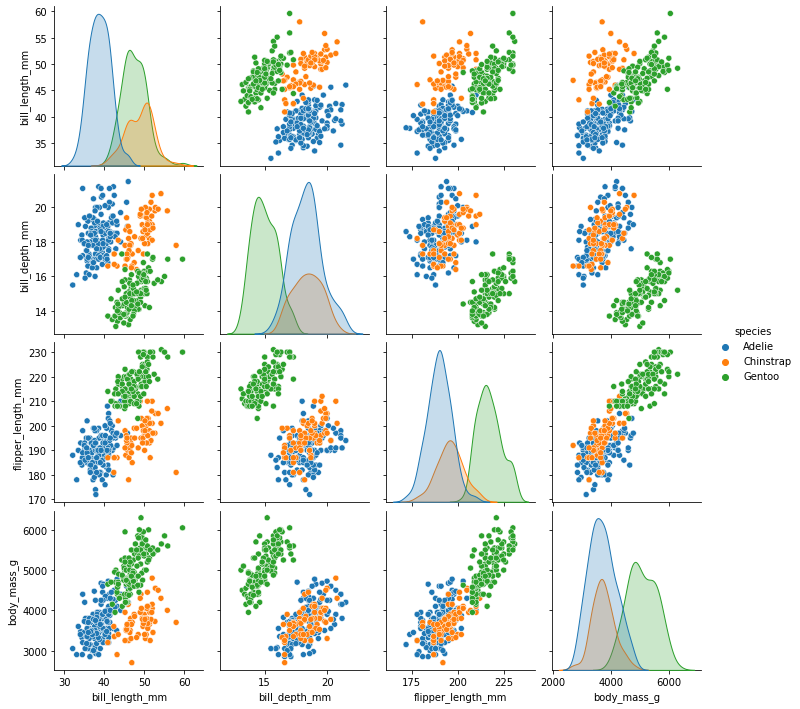

In [9]:
sns.pairplot(penguins, hue = "species")

**Seaborn + Matplotlib**

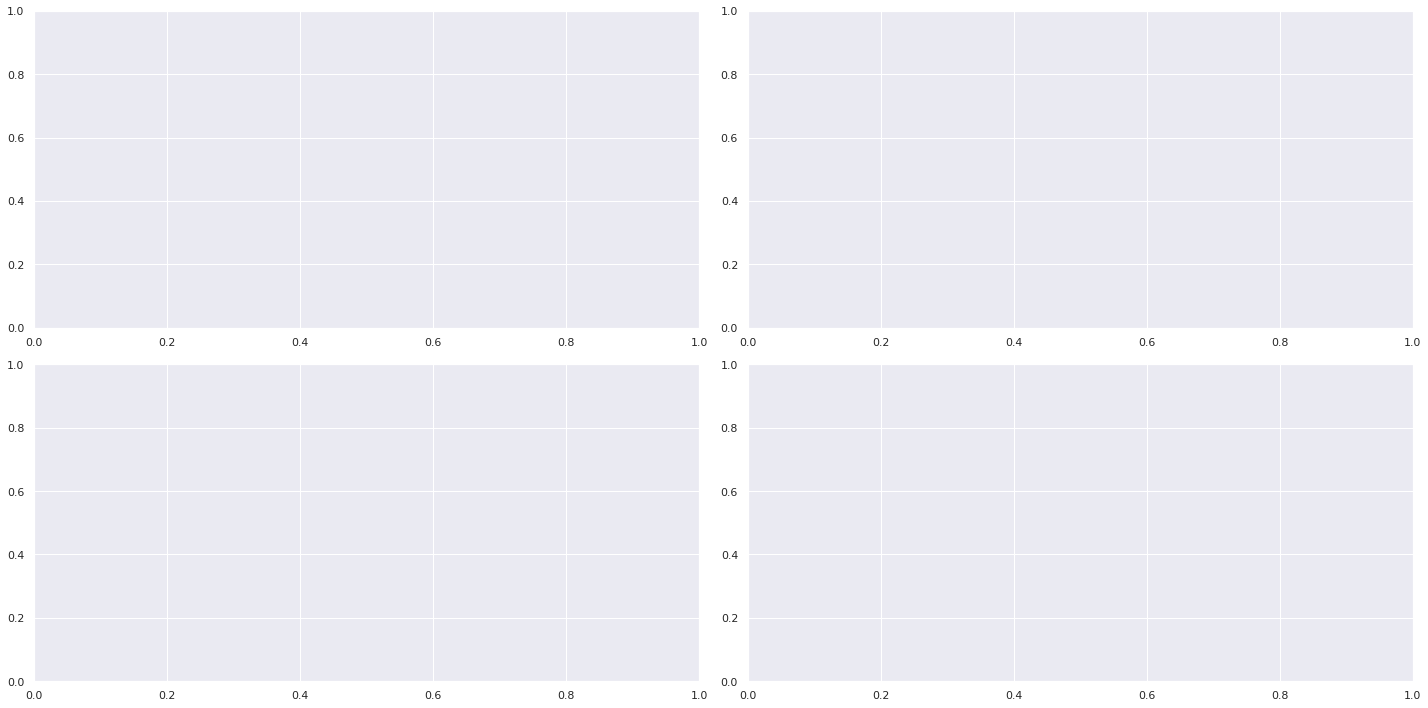

In [ ]:
window, graphic = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))
plt.tight_layout()

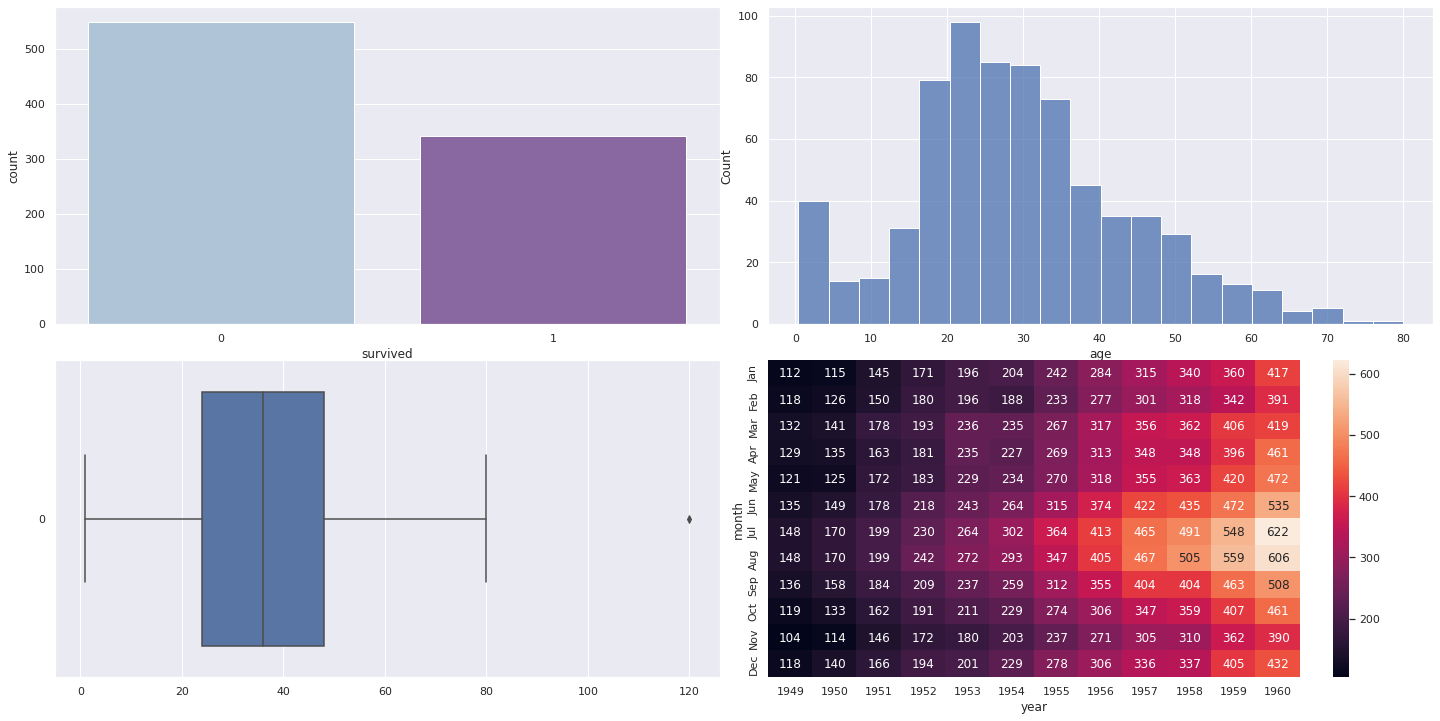

In [ ]:
sns.countplot(data = titanic, x = 'survived', palette="BuPu", ax = graphic[0][0])
sns.histplot(data = titanic, x = 'age', ax = graphic[0][1])
sns.boxplot(data = age_outlier, orient='h', ax = graphic[1][0])
sns.heatmap(data = flights, annot = True, fmt='.0f', ax = graphic[1][1])

window